#INDICACIONES : Para ejecutar los ejercicios vistos en clases , realizar una copia de este Google Colab o ejecutar las lineas de codigo en un Google Colab o entorno propio.

Para realizar la copia de este Google Colab , vas a la parte superior en "File", se abrirá un desplegable y se seleccionará el boton " Save a copy in Drive". Sobre ese nuevo Google Colab creado, si pueden ejecutar cambios.

Se pide no realizar cambios sobre este link original, solo en su propia copia creada.

In [1]:
import pandas as pd
import json
import re
import ast

In [2]:
movie_info = pd.read_csv('movies_metadata.csv')
movie_rating = pd.read_csv('ratings_small.csv')

<ipython-input-2-0b4ae10f0419>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_info = pd.read_csv('movies_metadata.csv')


In [3]:
movie_info.shape

(45466, 24)

In [4]:
movie_info.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
columns_info = ["id","original_title","genres"]
df_movie_info = movie_info[columns_info]
df_movie_info.head()

,id,original_title,genres
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]"


In [7]:
df_movie_info.isna().sum()

,0
id,0
original_title,0
genres,0


In [8]:

def obtener_nombre_primer_elemento(valor):
    matches = re.findall(r'\[.*?\]', valor)
    try:
        dictionary = ast.literal_eval(matches[0])
        genero = dictionary[0]['name']
        return genero
    except :
      return None

df_movie_info['main_genre'] = df_movie_info['genres'].apply(obtener_nombre_primer_elemento)


<ipython-input-8-63c4ee6a6a4f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_info['main_genre'] = df_movie_info['genres'].apply(obtener_nombre_primer_elemento)


In [9]:
df_movie_info.rename(columns={'id': 'movieId'}, inplace=True)


<ipython-input-9-f4f000c15e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_info.rename(columns={'id': 'movieId'}, inplace=True)


In [10]:
df_movie_info

,movieId,original_title,genres,main_genre
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Animation
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Adventure
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Romance
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Comedy
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",Comedy
...,...,...,...,...
45461,439050,رگ خواب,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",Drama
45462,111109,Siglo ng Pagluluwal,"[{'id': 18, 'name': 'Drama'}]",Drama
45463,67758,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",Action
45464,227506,Satana likuyushchiy,[],None


In [11]:
rows_to_remove = df_movie_info['movieId'].str.match(r'\d{4}-\d{2}-\d{2}')

# Eliminar las filas que contienen valores que parecen fechas
df_movie_info = df_movie_info[~rows_to_remove]

In [12]:
df_movie_info['movieId'] = df_movie_info['movieId'].astype(int)


<ipython-input-12-8dfe0d3ae04c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_info['movieId'] = df_movie_info['movieId'].astype(int)


In [ ]:
## Leer aqui
# df_movie_info = pd.read_csv('nuevo_archivo.csv')

In [ ]:
# df_movie_info.to_csv('nuevo_archivo.csv')

In [13]:
df_movie_info.head()

,movieId,original_title,genres,main_genre
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Animation
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Adventure
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Romance
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Comedy
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",Comedy


In [14]:
movie_rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [15]:
df_movie_user = movie_rating.merge(df_movie_info, on="movieId")

In [16]:

df_movie_user

,userId,movieId,rating,timestamp,original_title,genres,main_genre
0,1,1371,2.5,1260759135,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama
1,4,1371,4.0,949810302,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama
2,7,1371,3.0,851869160,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama
3,19,1371,4.0,855193404,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama
4,21,1371,3.0,853852263,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama
...,...,...,...,...,...,...,...
44989,652,129009,4.0,1442690827,Love Is a Ball,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",Comedy
44990,653,2103,3.0,948161066,Solaris,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",Drama
44991,659,167,4.0,836137550,K-PAX,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",Drama
44992,659,563,3.0,834694187,Starship Troopers,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",Adventure


In [17]:
tabla_model = pd.pivot_table(df_movie_user, values='rating', index=['userId'],
                       columns=['main_genre'], aggfunc="mean").reset_index()
tabla_model.columns

Index(['userId', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'],
      dtype='object', name='main_genre')

In [18]:
tabla_model

main_genre,userId,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,NaN,NaN,NaN,2.666667,NaN,NaN,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.333333,3.333333,5.0,3.363636,4.000000,5.0,3.350000,NaN,3.00,...,NaN,3.666667,NaN,NaN,4.0,3.0,NaN,4.00,4.5,NaN
2,3,3.750000,4.250000,NaN,4.125000,2.833333,NaN,3.454545,NaN,NaN,...,NaN,2.750000,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
3,4,4.466667,4.666667,NaN,4.090909,4.375000,5.0,4.081081,NaN,4.75,...,NaN,4.500000,4.333333,NaN,4.0,4.0,NaN,4.25,4.0,NaN
4,5,3.833333,3.750000,NaN,3.611111,4.083333,4.0,4.187500,NaN,4.10,...,NaN,3.750000,NaN,NaN,NaN,NaN,NaN,4.00,NaN,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,667,4.000000,3.250000,NaN,3.666667,2.500000,4.0,3.294118,NaN,3.00,...,NaN,2.500000,NaN,5.0,3.0,3.0,NaN,4.00,4.0,NaN
667,668,4.000000,NaN,NaN,NaN,NaN,4.0,4.250000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN
668,669,5.000000,NaN,NaN,4.000000,3.500000,NaN,4.000000,4.0,4.00,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
669,670,5.000000,NaN,NaN,4.000000,NaN,NaN,3.727273,NaN,3.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN


# Repliquemos lo anterior

In [19]:
import plotly.graph_objs as go
# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=tabla_model['Action'],
    y=tabla_model['Adventure'],
    z=tabla_model['Drama'],
    mode='markers',
    marker=dict(
        size=8,
        color='cyan',  # Color by the 'Drama' dimension
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Customize the layout
fig.update_layout(
    title='3D Plot of Action, Adventure, Drama',
    scene=dict(
        xaxis_title='Action',
        yaxis_title='Adventure',
        zaxis_title='Drama'
    ),
    width=900,  # Ancho del gráfico
    height=600  # Altura del gráfico
)

fig.show()

In [20]:
X1 = tabla_model.fillna(0).iloc[: , :].values


In [21]:
from sklearn.cluster import KMeans

inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 20 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1429: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



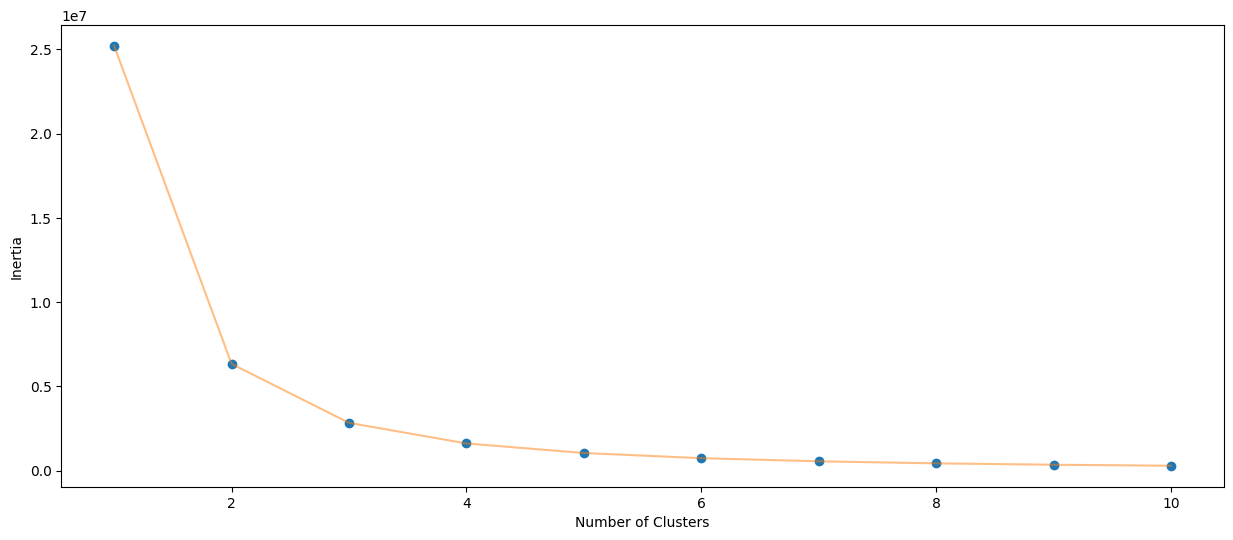

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [23]:
# TODO: Create an instance of KMeans to find X clusters
kmeans_1 = KMeans(n_clusters=3, random_state=0)

# TODO: use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(tabla_model.fillna(0))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [24]:
tabla_model['Cluster'] = predictions

In [25]:
tabla_model.head()

main_genre,userId,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Cluster
0,1,NaN,NaN,NaN,2.666667,NaN,NaN,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,3.333333,3.333333,5.0,3.363636,4.000000,5.0,3.350000,NaN,3.00,...,3.666667,NaN,NaN,4.0,3.0,NaN,4.00,4.5,NaN,0
2,3,3.750000,4.250000,NaN,4.125000,2.833333,NaN,3.454545,NaN,NaN,...,2.750000,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,0
3,4,4.466667,4.666667,NaN,4.090909,4.375000,5.0,4.081081,NaN,4.75,...,4.500000,4.333333,NaN,4.0,4.0,NaN,4.25,4.0,NaN,0
4,5,3.833333,3.750000,NaN,3.611111,4.083333,4.0,4.187500,NaN,4.10,...,3.750000,NaN,NaN,NaN,NaN,NaN,4.00,NaN,2.5,0


In [26]:
# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=tabla_model['Action'],
    y=tabla_model['Adventure'],
    z=tabla_model['Drama'],
    mode='markers',
    marker=dict(
        size=8,
        color=predictions,  # Color by the 'Drama' dimension
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Customize the layout
fig.update_layout(
    title='3D Plot of Action, Adventure, Drama',
    scene=dict(
        xaxis_title='Action',
        yaxis_title='Adventure',
        zaxis_title='Drama'
    ),
    width=900,  # Ancho del gráfico
    height=600  # Altura del gráfico
)

fig.show()

In [27]:
tabla_model.head()

main_genre,userId,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Cluster
0,1,NaN,NaN,NaN,2.666667,NaN,NaN,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,3.333333,3.333333,5.0,3.363636,4.000000,5.0,3.350000,NaN,3.00,...,3.666667,NaN,NaN,4.0,3.0,NaN,4.00,4.5,NaN,0
2,3,3.750000,4.250000,NaN,4.125000,2.833333,NaN,3.454545,NaN,NaN,...,2.750000,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,0
3,4,4.466667,4.666667,NaN,4.090909,4.375000,5.0,4.081081,NaN,4.75,...,4.500000,4.333333,NaN,4.0,4.0,NaN,4.25,4.0,NaN,0
4,5,3.833333,3.750000,NaN,3.611111,4.083333,4.0,4.187500,NaN,4.10,...,3.750000,NaN,NaN,NaN,NaN,NaN,4.00,NaN,2.5,0


## Como funciona el filtro colaborativo

La idea detras del filtro colaborativo, es que podamos primero encontrar similitudes entre las personas, en el caso anterior, encontraremos grupos en funcion de los generos que mas les gusta ver. A partir de ello, en cada cluster buscaremos las peliculas mas rankeadas, y lo que haremos es bridarle a cada usuario la lista de peliculas que aun no ha visto pero que su cluster si lo haya visto y tenga un buen puntaje

In [28]:
df_movie_user.head()

,userId,movieId,rating,timestamp,original_title,genres,main_genre
0,1,1371,2.5,1260759135,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama
1,4,1371,4.0,949810302,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama
2,7,1371,3.0,851869160,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama
3,19,1371,4.0,855193404,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama
4,21,1371,3.0,853852263,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama


In [29]:
df_movie_user_by_cluster = df_movie_user.merge(tabla_model[['userId','Cluster']],on='userId',how='left')

In [30]:
df_movie_user_by_cluster.head()

,userId,movieId,rating,timestamp,original_title,genres,main_genre,Cluster
0,1,1371,2.5,1260759135,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama,0
1,4,1371,4.0,949810302,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama,0
2,7,1371,3.0,851869160,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama,0
3,19,1371,4.0,855193404,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama,0
4,21,1371,3.0,853852263,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama,0


## ¿Como funciona el filtro?

Imaginemos que queremos recomendarle peliculas al usuario 7, que peliculas le recomendarian

In [31]:
df_movie_user_by_cluster[df_movie_user_by_cluster["userId"]==7]

## Tenemos el cluster 13

,userId,movieId,rating,timestamp,original_title,genres,main_genre,Cluster
2,7,1371,3.0,851869160,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama,0
48,7,1405,5.0,851866978,Greed,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",Drama,0
457,7,110,5.0,851868188,Trois couleurs : Rouge,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",Drama,0
2039,7,272,3.0,851868188,Batman Begins,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",Action,0
3042,7,364,3.0,851868020,Batman Returns,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",Action,0
3242,7,377,3.0,851869291,A Nightmare on Elm Street,"[{'id': 27, 'name': 'Horror'}]",Horror,0
3866,7,480,4.0,851869161,Monsoon Wedding,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Comedy,0
4200,7,500,3.0,851867669,Reservoir Dogs,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",Crime,0
4770,7,539,3.0,851867688,Psycho,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",Drama,0
4906,7,551,4.0,851868019,The Poseidon Adventure,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Action,0


In [33]:
## Top peliculas cluster 1
ranking_cluster0 = df_movie_user_by_cluster[df_movie_user_by_cluster["Cluster"]==0].groupby(['original_title'])["rating"].mean().sort_values(ascending=False)
ranking_cluster0 = ranking_cluster0.reset_index()
ranking_cluster0

,original_title,rating
0,Paper Man,5.0
1,Zaat,5.0
2,Basic Instinct 2,5.0
3,彼女の想いで,5.0
4,Gadjo Dilo,5.0
...,...,...
1856,The Creature Walks Among Us,0.5
1857,"Crosby, Stills & Nash: Long Time Comin'",0.5
1858,Crumb,0.5
1859,Muscle Beach Party,0.5


In [34]:
## ¿que peliculas ya vio el usuaruo 7
df_movie_user_by_cluster[df_movie_user_by_cluster["userId"]==7]["original_title"]

,original_title
2,Rocky III
48,Greed
457,Trois couleurs : Rouge
2039,Batman Begins
3042,Batman Returns
3242,A Nightmare on Elm Street
3866,Monsoon Wedding
4200,Reservoir Dogs
4770,Psycho
4906,The Poseidon Adventure


In [35]:
## ¿Que peliculas no ha visto, le recomendaremos 10 peliculas?
ranking_cluster0[~ranking_cluster0['original_title'].isin(df_movie_user_by_cluster[df_movie_user_by_cluster["userId"]==7]["original_title"])][0:10]

,original_title,rating
0,Paper Man,5.0
1,Zaat,5.0
2,Basic Instinct 2,5.0
3,彼女の想いで,5.0
4,Gadjo Dilo,5.0
5,Garde à vue,5.0
6,Only the Lonely,5.0
7,Zatōichi kenka-daiko,5.0
8,Aamdani Atthanni Kharcha Rupaiya,5.0
9,Singin' in the Rain,5.0


# Seguir recomendacion mas granulada (Optional)

¿ Y si, hacemos un modolo de clusterizacion mas complejo?

Cree unas funciones que permiten agilizar la corrida del modelo

In [59]:


def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    # 1- Count
    missing_values_count = user_movie_ratings.isnull().sum()

    sorted_columns = missing_values_count.sort_values().index.tolist()

    user_movie_ratings_sorted =user_movie_ratings[sorted_columns]
    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies

def get_users_who_rate_the_most(most_rated_movies, max_number_of_user):
    # Get most voting users
    # 1- Count
    most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))
    # 2- Sort
    most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
    # 3- Slice
    most_rated_movies_users_selection = most_rated_movies_users.iloc[:max_number_of_user, :]
    most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis=1)

    return most_rated_movies_users_selection

def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    most_rated_movies_prev = get_most_rated_movies(user_movie_ratings, n_movies)
    most_rated_movies = get_users_who_rate_the_most(most_rated_movies_prev, n_users)
    return most_rated_movies_prev,most_rated_movies

## Cargamos la información similar al caso anterior, sin embargo aqui haremos que cada pelicula sea una columna

In [60]:
user_movie_ratings=pd.pivot_table(df_movie_user, values='rating', index=['userId'],
                       columns=['original_title'], aggfunc="mean")

user_movie_ratings

original_title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...Più forte ragazzi!,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 + 1,...,사마리아,야수,연가시,오직 그대만,올드보이,"장화, 홍련",최종병기 활,친절한 금자씨,해안선,활
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Esta funcion les permitira poder observar solo el grupo de peliculas mas vistas por lo que no se veran tantos nulls

In [61]:
n_movies = 30
n_users = 10
most_rated_movies_prev , most_rated_movies_users_selection = sort_by_rating_density(user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)

dataset dimensions:  (10, 30)


In [55]:
most_rated_movies_prev

original_title,Terminator 3: Rise of the Machines,The Million Dollar Hotel,Солярис,The 39 Steps,Monsoon Wedding,Once Were Warriors,Trois couleurs : Rouge,Men in Black II,La passion de Jeanne d'Arc,Silent Hill,...,Rope,Titanic,A Nightmare on Elm Street,To Kill a Mockingbird,Bang Boom Bang - Ein todsicheres Ding,La belle et la bête,Bridge to Terabithia,...Più forte ragazzi!,Der Tunnel,counts
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4.0,NaN,3.0,NaN,4.0,4.0,4.0,NaN,NaN,3.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,12
3,4.5,5.0,3.0,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,3.5,NaN,2.5,2.0,NaN,NaN,NaN,4.5,NaN,14
4,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,...,5.0,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,11
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,...,NaN,5.0,4.0,4.0,3.5,NaN,NaN,4.0,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,5.0,NaN,NaN,NaN,4.0,NaN,4.0,5.0,NaN,NaN,...,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,11
668,5.0,4.0,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
669,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [54]:
most_rated_movies_users_selection

original_title,Terminator 3: Rise of the Machines,The Million Dollar Hotel,Солярис,The 39 Steps,Monsoon Wedding,Once Were Warriors,Trois couleurs : Rouge,Men in Black II,La passion de Jeanne d'Arc,Silent Hill,...,Say Anything...,Rope,Titanic,A Nightmare on Elm Street,To Kill a Mockingbird,Bang Boom Bang - Ein todsicheres Ding,La belle et la bête,Bridge to Terabithia,...Più forte ragazzi!,Der Tunnel
userId,,,,,,,,,,,,,,,,,,,,,
73,5.0,5.0,4.5,4.5,4.0,5.0,4.0,4.0,3.5,5.0,...,4.5,3.0,3.00,3.0,4.5,2.0,3.0,4.0,0.5,4.00
654,5.0,5.0,4.5,5.0,4.5,5.0,4.5,4.0,4.0,4.5,...,5.0,4.5,3.75,4.0,5.0,4.5,4.5,4.0,5.0,4.00
268,5.0,3.5,5.0,5.0,4.5,5.0,4.5,3.5,3.0,4.5,...,5.0,4.0,2.75,4.5,4.5,3.0,3.5,4.5,2.5,5.00
15,5.0,2.0,5.0,5.0,3.0,4.0,3.0,5.0,2.5,0.5,...,3.0,4.0,2.75,4.0,NaN,2.0,4.0,4.0,1.5,2.75
30,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,...,5.0,4.0,4.00,4.0,5.0,2.0,NaN,4.0,4.0,4.00
442,4.5,4.5,5.0,5.0,4.5,4.5,4.5,4.0,3.5,4.5,...,5.0,4.5,4.50,4.0,4.0,4.0,NaN,4.5,4.0,5.00
292,5.0,5.0,4.5,4.5,3.5,5.0,4.0,4.5,4.5,4.0,...,3.5,3.5,4.50,4.0,4.0,NaN,4.0,3.5,4.5,4.00
295,4.0,4.5,4.5,5.0,4.5,4.5,4.0,4.0,4.0,4.5,...,4.5,4.5,4.00,4.0,4.0,4.5,4.5,NaN,4.0,4.00
509,5.0,4.0,4.0,5.0,3.0,5.0,5.0,4.5,2.0,3.5,...,3.0,2.0,1.50,1.0,3.0,2.0,NaN,2.0,2.0,3.00


In [62]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):

    # Reverse to match the order of the printed dataframe
    #most_rated_movies_users_selection = most_rated_movies_users_selection.iloc[::-1]

    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()

    # Draw heatmap
    heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')

    if axis_labels:
        ax.set_yticks(np.arange(most_rated_movies_users_selection.shape[0]) , minor=False)
        ax.set_xticks(np.arange(most_rated_movies_users_selection.shape[1]) , minor=False)
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        labels = most_rated_movies_users_selection.columns.str[:40]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(most_rated_movies_users_selection.index, minor=False)
        plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    ax.grid(False)
    ax.set_ylabel('User id')

    # Separate heatmap from color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    # Color bar
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])

Visualizaremos lo anterior de una mejor manera con esta funcion

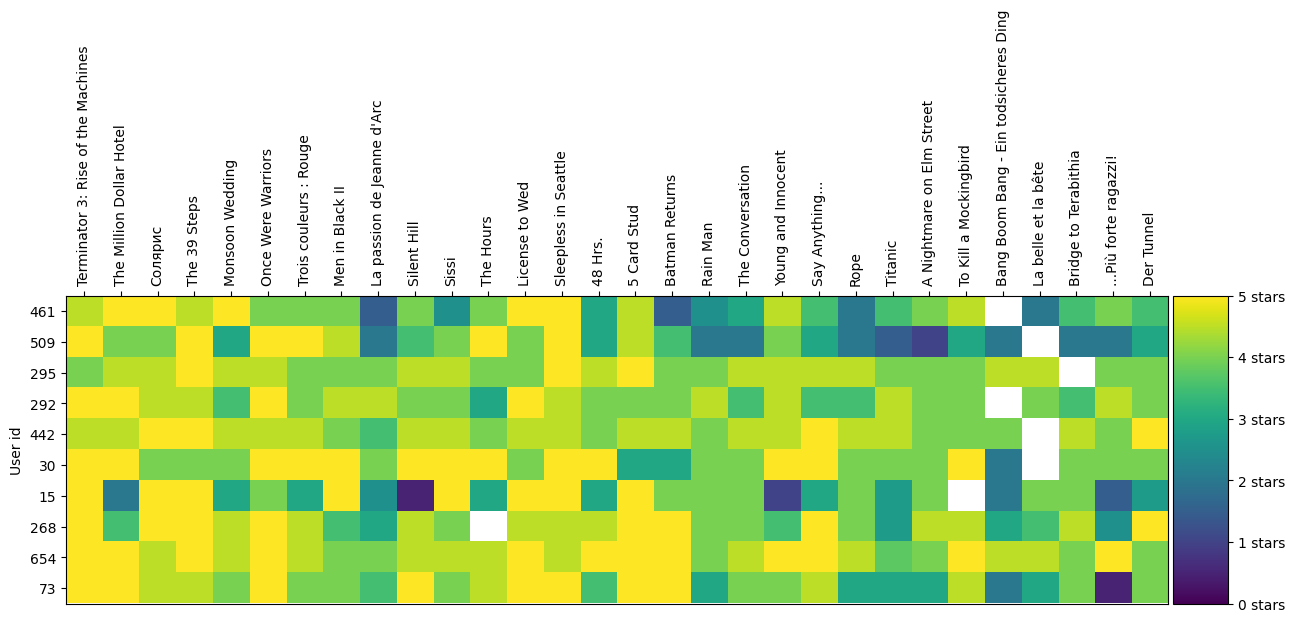

In [63]:
draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True)

Para no demorar procesando toda la informacion, reduciremos los datos a una muestra de solo 1000 peliculas con mas vistas

In [64]:

most_rated_movies_1k = get_most_rated_movies(user_movie_ratings, 1000)


Ahora crearemos una matriz para poder generar cluster a partir de la informacion del puntaje de todas las peliculas que han visto

In [65]:

from scipy.sparse import csr_matrix
for column in most_rated_movies_1k.columns:
    most_rated_movies_1k[column] = pd.arrays.SparseArray(most_rated_movies_1k[column], dtype=pd.SparseDtype("float", 0))
most_rated_movies_1k = most_rated_movies_1k.fillna(0)



In [66]:
sparse_ratings = csr_matrix(most_rated_movies_1k.sparse.to_coo())


In [67]:
predictions = KMeans(n_clusters=20, algorithm='lloyd').fit_predict(sparse_ratings)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [69]:
clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
#helper.draw_movie_clusters(clustered, max_users, max_movies)

In [70]:
clustered

,userId,Terminator 3: Rise of the Machines,The Million Dollar Hotel,Солярис,The 39 Steps,Monsoon Wedding,Once Were Warriors,Trois couleurs : Rouge,Men in Black II,La passion de Jeanne d'Arc,...,Star Trek III: The Search for Spock,Sex and the City,Stitches,Shrek the Third,Hellgate,Iron Eagle III,La Marche de l'empereur,Lara Croft: Tomb Raider,Forrest Gump,group
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,2,4.0,0.0,3.0,0.0,4.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,3,4.5,5.0,3.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
3,4,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,667,5.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
667,668,5.0,4.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
668,669,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
669,670,0.0,5.0,5.0,0.0,0.0,5.0,3.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [71]:
movies_datacluster_peliculas = df_movie_user.merge(clustered[['userId','group']],on='userId',how='left')

In [72]:
movies_datacluster_peliculas

,userId,movieId,rating,timestamp,original_title,genres,main_genre,group
0,1,1371,2.5,1260759135,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama,3
1,4,1371,4.0,949810302,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama,14
2,7,1371,3.0,851869160,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama,7
3,19,1371,4.0,855193404,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama,0
4,21,1371,3.0,853852263,Rocky III,"[{'id': 18, 'name': 'Drama'}]",Drama,1
...,...,...,...,...,...,...,...,...
44989,652,129009,4.0,1442690827,Love Is a Ball,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",Comedy,3
44990,653,2103,3.0,948161066,Solaris,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",Drama,3
44991,659,167,4.0,836137550,K-PAX,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",Drama,7
44992,659,563,3.0,834694187,Starship Troopers,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",Adventure,7


Veamos al usuario 11 y veamos que cluster tiene

In [73]:
movies_datacluster_peliculas[movies_datacluster_peliculas ["userId"]==11]

,userId,movieId,rating,timestamp,original_title,genres,main_genre,group
2218,11,296,5.0,1391658423,Terminator 3: Rise of the Machines,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",Action,3
6897,11,778,4.5,1391658505,Les Vacances de Monsieur Hulot,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",Comedy,3
7737,11,2762,3.0,1391658583,Young and Innocent,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",Drama,3
12051,11,1918,3.0,1391657062,Or,"[{'id': 18, 'name': 'Drama'}]",Drama,3
19361,11,1408,5.0,1391658667,Cutthroat Island,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Action,3
21789,11,70,1.0,1391656827,Million Dollar Baby,"[{'id': 18, 'name': 'Drama'}]",Drama,3
21837,11,169,3.0,1391657297,Predator 2,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",Science Fiction,3
21845,11,923,5.0,1391658556,Dawn of the Dead,"[{'id': 27, 'name': 'Horror'}]",Horror,3
21930,11,2042,3.5,1391657376,Savior,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",History,3
21940,11,26614,5.0,1391658574,La Chienne,"[{'id': 18, 'name': 'Drama'}]",Drama,3


 Seleccionamos un cluster 11 y calculamos los puntajes medios y lo rankeamos

In [75]:
top_peliculas = clustered[clustered["group"]==11][clustered.columns[1: len(clustered.columns) -1]].mean().reset_index().sort_values(0,ascending=False)
top_peliculas.columns = ["title","ranking"]
top_peliculas

,title,ranking
8,La passion de Jeanne d'Arc,3.648649
7,Men in Black II,3.000000
26,La belle et la bête,2.864865
33,Arlington Road,2.837838
3,The 39 Steps,2.594595
...,...,...
402,Mission: Impossible,0.000000
404,Mission: Impossible II,0.000000
405,Sicko,0.000000
406,Mad Dog Coll,0.000000


¿Qué peliculas vio el usuario 11?

In [76]:
movies_datacluster_peliculas [movies_datacluster_peliculas ["userId"]==11]["original_title"]

,original_title
2218,Terminator 3: Rise of the Machines
6897,Les Vacances de Monsieur Hulot
7737,Young and Innocent
12051,Or
19361,Cutthroat Island
21789,Million Dollar Baby
21837,Predator 2
21845,Dawn of the Dead
21930,Savior
21940,La Chienne


¿Qué peliculas el recomendamos con el nuevo modelo al usuario 11?

In [77]:
top_peliculas[ ~top_peliculas["title"].isin(movies_datacluster_peliculas[movies_datacluster_peliculas ["userId"]==11]["original_title"])].sort_values("ranking",ascending=False)[0:10]

,title,ranking
8,La passion de Jeanne d'Arc,3.648649
7,Men in Black II,3.000000
26,La belle et la bête,2.864865
33,Arlington Road,2.837838
3,The 39 Steps,2.594595
187,Shaft in Africa,2.567568
93,Donnie Darko,2.378378
78,Judgment Night,2.324324
107,2001: A Space Odyssey,2.297297
136,Lolita,2.243243
